# Sales Analysis
### Load necessary libraries

In [1]:
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt
import numpy
import collections
from collections import Counter
from itertools import combinations

### Merge the data files for each month into one DataFrame

In [2]:
file_merge =".csv"
all_filenames = [i for i in glob.glob(f"*{file_merge}")]

print(all_filenames) # to make sure all files made it

['Sales_December_2019.csv', 'Sales_April_2019.csv', 'Sales_February_2019.csv', 'all_months_data.csv', 'Sales_March_2019.csv', 'Sales_August_2019.csv', 'Sales_May_2019.csv', 'Sales_November_2019.csv', 'Sales_October_2019.csv', 'Sales_January_2019.csv', 'Sales_September_2019.csv', 'Sales_July_2019.csv', 'Sales_June_2019.csv']


In [3]:
#df = pd.concat([pd.read_csv(file) for file in all_filenames])
#df.head()

#df.to_csv('all_months_data.csv', index=False)

##  Light data exploration and cleaning
### Read in new DataFrame 

In [4]:
all_months_data = pd.read_csv('all_months_data.csv')
all_months_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
Order ID            186305 non-null object
Product             186305 non-null object
Quantity Ordered    186305 non-null object
Price Each          186305 non-null object
Order Date          186305 non-null object
Purchase Address    186305 non-null object
dtypes: object(6)
memory usage: 8.6+ MB


## Drop NaN values
#### No positive outcome with filling NaN values for this data

In [5]:
nan_df = all_months_data[all_months_data.isna().any(axis=1)] #finding NaN values 
display(nan_df)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
264,NaN,NaN,NaN,NaN,NaN,NaN
648,NaN,NaN,NaN,NaN,NaN,NaN
680,NaN,NaN,NaN,NaN,NaN,NaN
1385,NaN,NaN,NaN,NaN,NaN,NaN
1495,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
185795,NaN,NaN,NaN,NaN,NaN,NaN
185868,NaN,NaN,NaN,NaN,NaN,NaN
185887,NaN,NaN,NaN,NaN,NaN,NaN
185960,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
all_months_data = all_months_data.dropna(axis =0) #drop all rows with a NaN values

### Remove sub-headers

In [7]:
df_extra= all_months_data[all_months_data['Order ID']=='Order ID'] # find all sub-headers
df_extra

df_index = df_extra.reset_index() # move the index values into a column
display(df_index)

rows = df_index['index']    #use the new column 'index' to remove all sub-headers

all_months = all_months_data.drop(rows)

,index,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,254,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,705,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2,1101,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
3,2875,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
4,3708,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
...,...,...,...,...,...,...,...
350,183671,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
351,184012,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
352,184041,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
353,184275,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


### Fix columns data type into usable values

In [8]:
all_months['Quantity Ordered'] = pd.to_numeric(all_months['Quantity Ordered']) 
all_months['Price Each'] = pd.to_numeric(all_months['Price Each'])

pd.set_option("precision", 3)
pd.options.display.float_format = '{:,}'.format  #add commas
pd.options.display.float_format = "{:,.2f}".format # show 2 decimal places


#df['Value'] = df.apply(lambda x: "{:,}".format(x['Value']), axis=1) 
# will convert float to have a comma in it as well

#pd.set_option('display.float_format', float) # to avoid scientific notation

# output of cell 4 ---all_months_data.info()-- informs that these numbers are string 
# type (python object) and needs to be converted back to true numbers 

### Create a column for City, State and Month

In [9]:
def get_city(address):
    return address.split(",")[1].strip(" ")

def get_state(address):
    return address.split(",")[2].split(" ")[1]

all_months['City'] = all_months['Purchase Address'].apply(lambda x:f"{get_city(x)} ({get_state(x)})")

all_months['Month'] = all_months['Order Date'].str[0:2]    #create month column
all_months['Month'] = all_months['Month'].astype('int32')  

all_months.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,City,Month
0,295665,Macbook Pro Laptop,1,"1,700.00",12/30/19 00:01,"136 Church St, New York City, NY 10001",New York City (NY),12
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",New York City (NY),12
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",New York City (NY),12
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",San Francisco (CA),12
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",Atlanta (GA),12


## Data Exploration
### 1. What items are being sold?

In [10]:
occurrences= pd.DataFrame([collections.Counter(all_months['Product'])])
occurrences 

Unit_Totals = occurrences.transpose()
Unit_Totals = Unit_Totals.reset_index()
Unit_Totals['Unit Price']= ([1700, 600, 11.95, 149.99, 3.84, 99.99, 2.99, 999.99, 14.95,\
                             600, 11.99, 150, 400, 700, 109.99, 379.99, 300, 389.99, 600])
Unit_Totals.index = Unit_Totals.index + 1
Unit_Totals.rename(columns = {'index':'Products'}, inplace = True)
#Unit_Totals['Total Sales'] = (occurrences.transpose() * Unit_Totals['Unit Price'])
print('Amount of Units Sold    column 0 is the number of Units Sold')
Unit_Totals

Amount of Units Sold    column 0 is the number of Units Sold


,Products,0,Unit Price
1,Macbook Pro Laptop,4724,"1,700.00"
2,LG Washing Machine,666,600.00
3,USB-C Charging Cable,21903,11.95
4,27in FHD Monitor,7507,149.99
5,AA Batteries (4-pack),20577,3.84
6,Bose SoundSport Headphones,13325,99.99
7,AAA Batteries (4-pack),20641,2.99
8,ThinkPad Laptop,4128,999.99
9,Lightning Charging Cable,21658,14.95
10,Google Phone,5525,600.00


#### Charts showing what locations are selling what items with quantities and in what months is better served with a different platform such as Tableau

https://public.tableau.com/profile/beth.heinonen


### 2. Find out how many store locations there are 

In [11]:
all_citys = all_months['City'].unique() 
all_citys = pd.DataFrame(all_citys)
all_citys.index = all_citys.index + 1
all_citys

,0
1,New York City (NY)
2,San Francisco (CA)
3,Atlanta (GA)
4,Portland (OR)
5,Dallas (TX)
6,Los Angeles (CA)
7,Boston (MA)
8,Austin (TX)
9,Portland (ME)
10,Seattle (WA)


In [12]:
locations = all_months['Purchase Address'].value_counts()
location =pd.DataFrame(locations)

location.describe() 

,Purchase Address
count,"140,787.00"
mean,1.32
std,0.63
min,1.00
25%,1.00
50%,1.00
75%,2.00
max,9.00


### There are over 140,000 loactions, only 31.7% of stores have more than one sale 
This dataset is good for City/State break downs 

### 3. What was the best month for sales?

In [13]:
all_months['Sales total'] = all_months['Quantity Ordered'].astype('int')\
                            * all_months['Price Each'].astype('int')

all_months['Sales total'] = all_months['Sales total'].astype('float')

bd_months = all_months.groupby(['Month']).sum()
bd_months['% Change'] =(((bd_months['Quantity Ordered'] - 10903)/ 10903) *100)
bd_months = bd_months.drop(['Price Each'], axis= 1)
print('Monthly Break Down')
print('% change is based on changes from January')
bd_months

Monthly Break Down
% change is based on changes from January


,Quantity Ordered,Sales total,% Change
Month,,,
1,10903,"1,813,956.00",0.00
2,13449,"2,191,696.00",23.35
3,17005,"2,794,068.00",55.97
4,20558,"3,374,951.00",88.55
5,18667,"3,138,287.00",71.21
6,15253,"2,566,187.00",39.90
7,16072,"2,635,443.00",47.41
8,13448,"2,234,194.00",23.34
9,13109,"2,087,435.00",20.23


#### Orders increased 157% from January to December

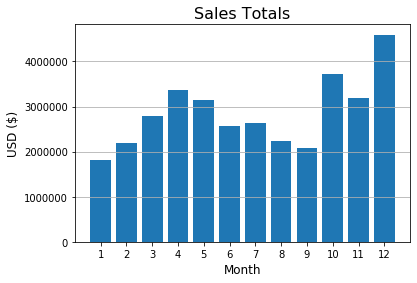

In [14]:
months_cal = range(1,13)

plt.bar(months_cal, all_months.groupby(['Month']).sum()['Sales total'])
plt.title('Sales Totals', fontdict= {'fontsize': 16})
plt.xticks(months_cal)
plt.grid(axis= 'y')
plt.ylabel('USD ($)', fontdict= {'fontsize': 12})
plt.xlabel('Month', fontdict= {'fontsize': 12})
plt.show()

 Shown in the above barchart December had the most sales at $4,591,824 

 the 4th quater was the best with $11,495,423 
 
                        TOTAL          MEAN
        Q4           $11,495,423   $3,831,807
        Q3            $6,957,072   $2,319,024
        Q2            $9,079,425   $3,026,471         
        Q1            $6,799,720   $2,266,573
        
#### Months with highest sales coincide with Graduation from High School/ College and Christmas shopping

### 4. Which hour(s) were the most successful?

In [15]:
all_months['Hour'] = pd.to_datetime(all_months['Order Date']).dt.hour
all_months['Tally'] = 1  # this is done to mark there was a sale in that timestamp.
all_months.head(3)       # If 'Quantity Ordered' was used this would skew the calculation 
                         # when there were more than one item bought in a purchase

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,City,Month,Sales total,Hour,Tally
0,295665,Macbook Pro Laptop,1,"1,700.00",12/30/19 00:01,"136 Church St, New York City, NY 10001",New York City (NY),12,"1,700.00",0,1
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",New York City (NY),12,600.00,7,1
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",New York City (NY),12,11.00,18,1


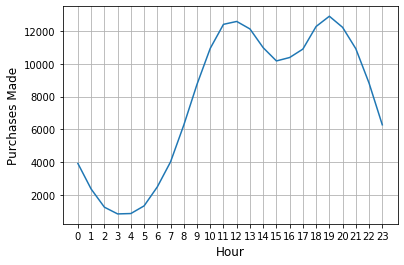

In [16]:
keys = [pair for pair, df in all_months.groupby(['Hour'])]

plt.plot(keys, all_months.groupby(['Hour']).count()['Tally'])
plt.xticks(keys)
plt.title('')
plt.grid()
plt.ylabel('Purchases Made', fontdict= {'fontsize': 12})
plt.xlabel('Hour', fontdict= {'fontsize': 12})
plt.show()

#### Peak time frames fall within typical lunch hour and after work rush ( 11am-1pm ) and then ( 6pm-8pm )

### 5. Which City perfromed the best?



In [17]:
Cities = pd.DataFrame(all_months.groupby(['City']).sum())
Cities = Cities. drop(['Hour','Tally','Price Each','Month'], axis= 1)
Cities

,Quantity Ordered,Sales total
City,,
Atlanta (GA),16602,"2,782,841.00"
Austin (TX),11153,"1,811,054.00"
Boston (MA),22528,"3,644,327.00"
Dallas (TX),16730,"2,755,117.00"
Los Angeles (CA),33289,"5,426,973.00"
New York City (NY),27932,"4,642,872.00"
Portland (ME),2750,"447,661.00"
Portland (OR),11303,"1,862,056.00"
San Francisco (CA),50239,"8,223,669.00"


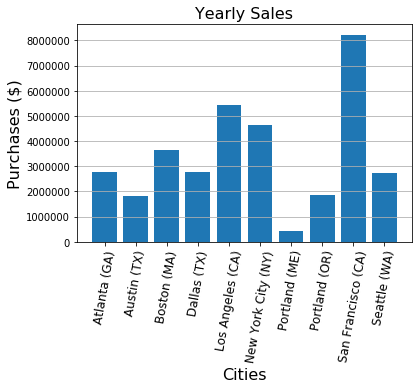

In [18]:
keys = [city for city, df in all_months.groupby(['City'])] # get the city names listed with correct values 

plt.bar(keys, all_months.groupby(['City']).sum()['Sales total'])
plt.title('Yearly Sales', fontdict= {'fontsize': 16})
plt.xticks(keys, rotation= 80, size =12)
plt.ylabel('Purchases ($)', fontdict= {'fontsize': 16})
plt.xlabel('Cities', fontdict= {'fontsize': 16})
plt.grid(axis ='y')
plt.show()

### 6. Which Product performed the best?

In [19]:
Products_sales =pd.DataFrame(all_months.groupby(['Product'])['Sales total'].sum())
Products_sales = Products_sales.reset_index()
Products_sales['Unit Price'] = ([109.99, 389.99, 149.99, 379.99,3.84, 2.99, \
                                 150, 99.99, 300, 600, 600, 600 ,14.95, 1700,\
                                 999.99, 11.95, 400, 11.99,700])
Products_sales['Units Sold'] = Products_sales['Sales total'].astype('int')/ \
                               Products_sales['Unit Price'].astype('int')
Products_sales['Units Sold']= Products_sales['Units Sold'].astype('int')

Products_sales

,Product,Sales total,Unit Price,Units Sold
0,20in Monitor,"450,061.00",109.99,4129
1,27in 4K Gaming Monitor,"2,428,916.00",389.99,6244
2,27in FHD Monitor,"1,124,950.00",149.99,7550
3,34in Ultrawide Monitor,"2,349,421.00",379.99,6199
4,AA Batteries (4-pack),"82,905.00",3.84,27635
5,AAA Batteries (4-pack),"62,034.00",2.99,31017
6,Apple Airpods Headphones,"2,349,150.00",150.00,15661
7,Bose SoundSport Headphones,"1,332,243.00",99.99,13457
8,Flatscreen TV,"1,445,700.00",300.00,4819
9,Google Phone,"3,319,200.00",600.00,5532


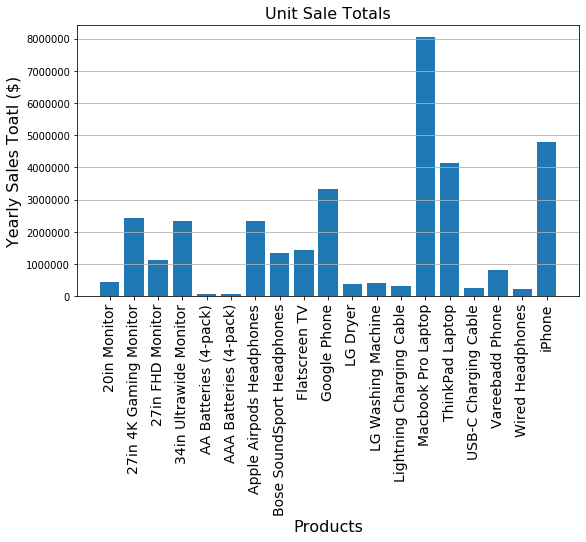

In [20]:
keys = [product for product, df in all_months.groupby(['Product'])]

plt.bar(keys, all_months.groupby(['Product']).sum()['Sales total'])
plt.title('Unit Sale Totals', fontdict= {'fontsize': 16})
plt.xticks(keys, rotation= 90, size =14)
plt.ylabel('Yearly Sales Toatl ($)', fontdict= {'fontsize': 16})
plt.xlabel('Products', fontdict= {'fontsize': 16})
plt.grid(axis ='y')

fig = plt.gcf()
fig.set_size_inches(9,5)

plt.show()

operation cost data would be needed to provide a better analysis

 Macbook Pro earned  $8,037,600 with 4,728 Units sold --- most earned

AAA Batteries earned $62,034 with 31,017 units sold --- most units sold

### 6. Products that were sold together

In [21]:
dups = all_months[all_months['Order ID'].duplicated(keep = False)] # want to use the duplicates

dups['Grouped'] = dups.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
dups2 = dups[['Order ID', 'Grouped']].drop_duplicates()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [22]:
count = Counter()

for row in dups2['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

for key,value in count.most_common(10):
    print(key, value)
    

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


#### This lists out the top 10 combinations of products buoght together. The number after the parentheses is the total number of times that it occurred